In [9]:
import pandas as pd

In [3]:
conda install -c conda-forge transformers huggingface_hub

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/gulsumbudakoglu/opt/anaconda3

  added / updated specs:
    - huggingface_hub
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.12.7  |       h033912b_0         142 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-4.14.0               |   py39h6e9494a_0        1022 KB  conda-forge
    huggingface_hub-0.13.3     |     pyhd8ed1ab_0         140 KB  conda-forge
    openssl-1.1.1t             |       hfd90126_0         1.7 MB  conda-forge
    ------------------------------------------------------------
                                         

In [4]:
conda install -c huggingface transformers

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::dask-core==2021.10.0=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::patsy==0.5.2=py39hecd8cb5_0
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::distributed==2021.10.0=py39hecd8cb5_0
  - defaults/osx-64::notebook==6.4.5=py39hecd8cb5_0
  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/osx-64::astropy==4.3.1=py39hf9932de_0
  - defaults/osx-64::scikit-learn-intelex==2021.3.0=py39hecd8cb5_0
  - defaults/osx-64::pytest==6.2.4=py39hecd8cb5_2
  - defaults/noarch::bleach==4.0.0=pyhd3eb1b0_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd

In [3]:
from sentence_transformers import SentenceTransformer, models, InputExample, losses
from torch import nn
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, util

In [2]:
from sentence_transformers import SentenceTransformer

In [131]:
#dataset: https://huggingface.co/datasets/stsb_multi_mt/viewer/en/train

from datasets import load_dataset
dataset = load_dataset("stsb_multi_mt", "en")

print(dataset)

Dataset stsb_multi_mt downloaded and prepared to /Users/gulsumbudakoglu/.cache/huggingface/datasets/stsb_multi_mt/en/1.0.0/a5d260e4b7aa82d1ab7379523a005a366d9b124c76a5a5cf0c4c5365458b0ba9. Subsequent calls will reuse this data.


100%|██████████| 3/3 [00:00<00:00, 544.79it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 5749
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 1379
    })
    dev: Dataset({
        features: ['sentence1', 'sentence2', 'similarity_score'],
        num_rows: 1500
    })
})


In [132]:
dataset["train"]

Dataset({
    features: ['sentence1', 'sentence2', 'similarity_score'],
    num_rows: 5749
})

In [134]:
# assume that we have already loaded the dataset called "dataset"
for split, data in dataset.items():
    data.to_csv(f"stsb_multi_mt-dataset-{split}.csv", index = None)

Creating CSV from Arrow format: 100%|██████████| 2/2 [00:00<00:00, 242.17ba/s]


In [3]:
train = pd.read_csv("/Users/gulsumbudakoglu/Desktop/working_mix/glue_mrpc-dataset-train.csv")
train.head()

,sentence1,sentence2,label,idx
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4


In [4]:
val = pd.read_csv("/Users/gulsumbudakoglu/Desktop/working_mix/glue_mrpc-dataset-validation.csv")
val.head()

,sentence1,sentence2,label,idx
0,He said the foodservice pie business doesn 't ...,""" The foodservice pie business does not fit ou...",1,9
1,Magnarelli said Racicot hated the Iraqi regime...,"His wife said he was "" 100 percent behind Geor...",0,18
2,"The dollar was at 116.92 yen against the yen ,...","The dollar was at 116.78 yen JPY = , virtually...",0,25
3,The AFL-CIO is waiting until October to decide...,The AFL-CIO announced Wednesday that it will d...,1,32
4,No dates have been set for the civil or the cr...,No dates have been set for the criminal or civ...,0,33


In [10]:
test = pd.read_csv("/Users/gulsumbudakoglu/Desktop/working_mix/stsb_multi_mt-dataset-test.csv")
test['similarity_score'] = test['similarity_score'].astype(float)

In [174]:
val['label'] = val['label'].astype(float)
train['label'] = train['label'].astype(float)
test['label'] = test['label'].astype(float)

NameError: name 'val' is not defined

### Fine Tuned Model

In [2]:
word_embedding_model = models.Transformer('distilbert-base-uncased', max_seq_length=128)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])


NameError: name 'models' is not defined

In [42]:
# create evaluation

evaluator_val = EmbeddingSimilarityEvaluator(list(val.sentence1), 
                                         list(val.sentence2), 
                                         list(val.label),
                                         name='sts-dev')

In [43]:
# train 
tr_data   = [InputExample(texts=[s[0], s[1]],  label = [s[2]] ) \
                 for s in list(train[ ['sentence1', 'sentence2', 'label'] ].drop_duplicates().values)]

In [46]:
train_dataloader = DataLoader(tr_data, shuffle=True, batch_size=2)
train_loss = losses.CosineSimilarityLoss(model)

In [ ]:
#Fine-Tuned the model:
model_path = "/Users/gulsumbudakoglu/Desktop/working_mix/model"
model.fit(train_objectives=[(train_dataloader, train_loss)], 
          
          evaluator = evaluator_val,  evaluation_steps=100,
          epochs=1, warmup_steps=500,optimizer_params={'lr': 2e-2},
          show_progress_bar=True, 
          save_best_model = True,
          output_path=model_path)

### Loading Model

In [4]:
model = SentenceTransformer("/Users/gulsumbudakoglu/Desktop/working_mix/model")

In [6]:
word_embedding_model = models.Transformer('/Users/gulsumbudakoglu/Desktop/working_mix/model', max_seq_length=128)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

In [7]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [11]:
embeddings1 = model.encode(test["sentence1"].to_list(), convert_to_tensor=True)
embeddings2 = model.encode(test["sentence2"].to_list(), convert_to_tensor=True)

In [12]:
test["embedding_sentence1"] = [t.numpy() for t in embeddings1]
test["embedding_sentence2"] = [t.numpy() for t in embeddings2]

In [13]:
#adding embeddings
df1 = pd.DataFrame(test['embedding_sentence1'].tolist(), index= test.index).add_prefix('sentence1_embedding_').fillna('')
df2 = pd.DataFrame(test['embedding_sentence2'].tolist(), index= test.index).add_prefix('sentence2_embedding_').fillna('')

test = test.join(df1)
test = test.join(df2)

In [14]:
test.head()

,sentence1,sentence2,similarity_score,embedding_sentence1,embedding_sentence2,sentence1_embedding_0,sentence1_embedding_1,sentence1_embedding_2,sentence1_embedding_3,sentence1_embedding_4,...,sentence2_embedding_758,sentence2_embedding_759,sentence2_embedding_760,sentence2_embedding_761,sentence2_embedding_762,sentence2_embedding_763,sentence2_embedding_764,sentence2_embedding_765,sentence2_embedding_766,sentence2_embedding_767
0,A girl is styling her hair.,A girl is brushing her hair.,2.5,"[0.29114142, -0.4535064, -0.2336297, -0.060415...","[0.20029347, -0.43080962, -0.25721815, -0.0933...",0.291141,-0.453506,-0.233630,-0.060416,0.345427,...,-0.019870,-0.249291,0.114110,-0.254553,-0.012635,-0.181735,-0.048329,-0.520970,0.119131,-0.096987
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6,"[0.11425072, -0.10386596, -0.37226626, -0.0085...","[0.13974287, -0.13874765, -0.32828426, 0.00908...",0.114251,-0.103866,-0.372266,-0.008557,0.354328,...,-0.122767,-0.304776,-0.030770,-0.158675,-0.175116,-0.135144,-0.231277,-0.451960,0.133813,-0.272363
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0,"[0.063438155, -0.3298023, -0.3007227, -0.10424...","[0.012412683, -0.40886432, -0.27465093, -0.117...",0.063438,-0.329802,-0.300723,-0.104240,0.164086,...,0.150757,-0.172899,0.080420,-0.264386,-0.007247,-0.309622,0.013972,-0.509904,0.062374,-0.105778
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2,"[0.040492628, -0.25955483, -0.35974133, 0.0179...","[-0.002026867, -0.29833025, -0.36179078, 0.013...",0.040493,-0.259555,-0.359741,0.017904,0.328225,...,-0.029116,-0.129500,0.022953,-0.143547,0.110926,-0.053076,-0.071818,-0.231033,0.169862,-0.004567
4,A man is playing a harp.,A man is playing a keyboard.,1.5,"[0.15854508, -0.07991676, -0.3511108, -0.07165...","[-0.012954507, -0.13547927, -0.31662795, -0.05...",0.158545,-0.079917,-0.351111,-0.071651,0.255848,...,0.075403,-0.253039,0.114440,-0.166727,0.090447,-0.020665,0.074338,-0.423784,0.187310,-0.159755


In [15]:
#Output the pairs with their score
#Compute cosine-similarities

cosine_scores = util.cos_sim(embeddings1, embeddings2)
cosine_similarity = []
for i in range(len(test.sentence1)):
    cosine_similarity.append(cosine_scores[i][i].numpy())

test['cosine_similarity'] = cosine_similarity
    

In [16]:
test.cosine_similarity.max()

array(0.9982512, dtype=float32)

In [17]:
test["normalize_cosine_similarity"] = 5 * (test["cosine_similarity"]-1) +5

In [18]:
test.head()

,sentence1,sentence2,similarity_score,embedding_sentence1,embedding_sentence2,sentence1_embedding_0,sentence1_embedding_1,sentence1_embedding_2,sentence1_embedding_3,sentence1_embedding_4,...,sentence2_embedding_760,sentence2_embedding_761,sentence2_embedding_762,sentence2_embedding_763,sentence2_embedding_764,sentence2_embedding_765,sentence2_embedding_766,sentence2_embedding_767,cosine_similarity,normalize_cosine_similarity
0,A girl is styling her hair.,A girl is brushing her hair.,2.5,"[0.29114142, -0.4535064, -0.2336297, -0.060415...","[0.20029347, -0.43080962, -0.25721815, -0.0933...",0.291141,-0.453506,-0.233630,-0.060416,0.345427,...,0.114110,-0.254553,-0.012635,-0.181735,-0.048329,-0.520970,0.119131,-0.096987,0.9938881,4.96944
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6,"[0.11425072, -0.10386596, -0.37226626, -0.0085...","[0.13974287, -0.13874765, -0.32828426, 0.00908...",0.114251,-0.103866,-0.372266,-0.008557,0.354328,...,-0.030770,-0.158675,-0.175116,-0.135144,-0.231277,-0.451960,0.133813,-0.272363,0.99287784,4.964389
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0,"[0.063438155, -0.3298023, -0.3007227, -0.10424...","[0.012412683, -0.40886432, -0.27465093, -0.117...",0.063438,-0.329802,-0.300723,-0.104240,0.164086,...,0.080420,-0.264386,-0.007247,-0.309622,0.013972,-0.509904,0.062374,-0.105778,0.9908508,4.954254
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2,"[0.040492628, -0.25955483, -0.35974133, 0.0179...","[-0.002026867, -0.29833025, -0.36179078, 0.013...",0.040493,-0.259555,-0.359741,0.017904,0.328225,...,0.022953,-0.143547,0.110926,-0.053076,-0.071818,-0.231033,0.169862,-0.004567,0.99579525,4.978976
4,A man is playing a harp.,A man is playing a keyboard.,1.5,"[0.15854508, -0.07991676, -0.3511108, -0.07165...","[-0.012954507, -0.13547927, -0.31662795, -0.05...",0.158545,-0.079917,-0.351111,-0.071651,0.255848,...,0.114440,-0.166727,0.090447,-0.020665,0.074338,-0.423784,0.187310,-0.159755,0.9917424,4.958712


In [19]:
test.similarity_score.max()

5.0

#### PCA

In [20]:
from pandas import read_csv
from sklearn.decomposition import PCA

X = test[test.columns[6:]].drop(["cosine_similarity","normalize_cosine_similarity"], axis = 1)
pca = PCA(n_components=100)
fit = pca.fit(X)




In [21]:
fit.explained_variance_ratio_.sum()

0.8234046

In [22]:
fit.explained_variance_ratio_

array([0.19347037, 0.10685235, 0.05434232, 0.02662617, 0.02207572,
       0.01897464, 0.01739104, 0.01520962, 0.01415205, 0.01322373,
       0.01205466, 0.01159548, 0.01035808, 0.01013825, 0.00912039,
       0.00880299, 0.00868797, 0.00840549, 0.0081171 , 0.00785718,
       0.00752255, 0.0067913 , 0.00653185, 0.00635385, 0.00606918,
       0.005919  , 0.00577255, 0.00567197, 0.00543776, 0.00534838,
       0.00494511, 0.00483001, 0.00474324, 0.00465312, 0.00449277,
       0.00439431, 0.00435253, 0.00401441, 0.00390514, 0.00381124,
       0.00374283, 0.00367648, 0.00361936, 0.0034384 , 0.00340537,
       0.0033668 , 0.00335892, 0.00330387, 0.00323471, 0.0031181 ,
       0.0030599 , 0.00301396, 0.00297304, 0.00283747, 0.00282561,
       0.00280033, 0.00275738, 0.00268581, 0.00263687, 0.00258802,
       0.00254192, 0.00251192, 0.00247052, 0.00243492, 0.00240527,
       0.00238351, 0.00235733, 0.00232096, 0.00227932, 0.00224656,
       0.00223003, 0.00217879, 0.00215987, 0.00212309, 0.00209

In [23]:
abs( fit.components_ )

array([[0.00142809, 0.03237196, 0.00384802, ..., 0.02873807, 0.01096037,
        0.02108205],
       [0.01467497, 0.01652082, 0.00999699, ..., 0.03564296, 0.00365135,
        0.02391426],
       [0.01342071, 0.04391173, 0.04222294, ..., 0.03755058, 0.0225993 ,
        0.01116346],
       ...,
       [0.01292618, 0.01052875, 0.0300341 , ..., 0.01979784, 0.00540628,
        0.00977627],
       [0.0388803 , 0.00918446, 0.01878456, ..., 0.0096891 , 0.00865027,
        0.01366729],
       [0.00623104, 0.00048778, 0.00527597, ..., 0.00218052, 0.00743554,
        0.0142049 ]], dtype=float32)

In [24]:
abs( fit.components_ )[0]

array([0.00142809, 0.03237196, 0.00384802, ..., 0.02873807, 0.01096037,
       0.02108205], dtype=float32)

In [25]:
abs( fit.components_ )[0].shape

(1535,)

In [26]:
abs( fit.components_ ).shape

(100, 1535)

In [153]:
keys = X.columns.to_list()
values = (abs( fit.components_ )[0]).tolist()
pca_importance = dict(zip(keys, values))

In [154]:
sorted(pca_importance.items(), key=lambda x:x[1], reverse=True)

[('sentence2_embedding_197', 0.09888311475515366),
 ('sentence1_embedding_197', 0.09705916047096252),
 ('sentence2_embedding_287', 0.07384604960680008),
 ('sentence2_embedding_355', 0.07216719537973404),
 ('sentence1_embedding_287', 0.07155722379684448),
 ('sentence2_embedding_445', 0.07127373665571213),
 ('sentence1_embedding_121', 0.07071029394865036),
 ('sentence1_embedding_355', 0.07046826928853989),
 ('sentence1_embedding_445', 0.07043750584125519),
 ('sentence2_embedding_739', 0.07032959163188934),
 ('sentence2_embedding_121', 0.07032907754182816),
 ('sentence2_embedding_521', 0.06934863328933716),
 ('sentence1_embedding_739', 0.06909968703985214),
 ('sentence1_embedding_521', 0.06893042474985123),
 ('sentence2_embedding_308', 0.06878375262022018),
 ('sentence2_embedding_564', 0.06868603825569153),
 ('sentence2_embedding_429', 0.06807688623666763),
 ('sentence2_embedding_234', 0.06790240108966827),
 ('sentence2_embedding_458', 0.06724788248538971),
 ('sentence2_embedding_420', 0.

In [155]:
selected_features = ['sentence2_embedding_197',
 'sentence1_embedding_197', 
 'sentence2_embedding_287', 
 'sentence2_embedding_355', 
 'sentence1_embedding_287', 
 'sentence2_embedding_445',
 'sentence1_embedding_121', 
 'sentence1_embedding_355', 
 'sentence1_embedding_445']

In [34]:
#another PCA

X = test[test.columns[6:]].drop(["cosine_similarity","normalize_cosine_similarity"], axis = 1)
from sklearn.preprocessing import StandardScaler
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

from sklearn.decomposition import PCA
components = 100
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA(n_components=100)

In [35]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.00170833 0.03140869 0.00531511 ... 0.03097063 0.01669005 0.02494945]
 [0.01691701 0.01601673 0.01515219 ... 0.03724864 0.00620459 0.02722421]
 [0.02057432 0.04100564 0.05885004 ... 0.03691852 0.0357882  0.0108022 ]
 ...
 [0.03326759 0.01087267 0.00952393 ... 0.00331634 0.00624418 0.01976423]
 [0.04298794 0.0018007  0.05275736 ... 0.00463695 0.00892823 0.01832534]
 [0.02039908 0.01160918 0.01519002 ... 0.02298593 0.02780519 0.0356017 ]]


In [36]:
#Transforming all the 1000 Columns to the 100 Principal Components

X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(1379, 100)
[[-20.767998    -1.492638     4.213367   ...  -0.20900626   0.19545811
   -0.45299903]
 [-21.90242      2.4810104   -0.13699868 ...   0.29234362   0.58828235
    2.5093718 ]
 [ -9.568686    -0.88887715  -1.354682   ...  -2.6436372    2.6058354
    0.67865586]
 ...
 [ 15.646429    -0.82168126   6.3506474  ...  -3.0471177    2.8969803
    1.2826385 ]
 [ 15.313958    16.581984     4.8563547  ...   1.0521681    2.7916834
   -2.068345  ]
 [ 10.723261    17.342033    11.491064   ...   0.95055723   0.05207443
   -1.8454673 ]]


In [42]:
df_pca = pd.DataFrame(X_pca).add_prefix('pca_').fillna('')

In [43]:
df_pca

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,-20.767998,-1.492638,4.213367,-1.281996,4.848242,2.541546,6.211954,-0.109429,-1.209310,-4.227577,...,1.352321,-0.266885,-1.522740,-0.846731,0.579256,-0.743717,1.016074,-0.209006,0.195458,-0.452999
1,-21.902420,2.481010,-0.136999,5.184860,2.438248,-6.789428,-3.155573,7.845998,3.556805,3.302189,...,0.972367,-0.789951,0.144599,-0.678707,-0.042488,-0.972457,-1.158199,0.292344,0.588282,2.509372
2,-9.568686,-0.888877,-1.354682,0.740306,2.545694,8.122953,5.679754,-6.932533,-2.408668,-2.438761,...,-1.118802,-2.698844,-3.747291,0.973361,-0.714229,1.107093,-1.824054,-2.643637,2.605835,0.678656
3,-14.621943,1.326947,-0.754699,0.721336,8.388165,10.313578,2.412418,-11.409355,3.719176,-0.430950,...,-0.570739,2.007859,-0.482227,-0.446413,-0.259920,0.239762,-0.725142,-0.217533,2.488656,0.818793
4,-22.056459,-2.322771,2.640512,-3.974989,3.211855,7.178257,4.960612,1.113985,-1.673565,-0.226188,...,0.623961,0.465060,0.088989,-0.030512,-0.394991,-0.056882,0.635351,-1.449251,0.412576,-0.176740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,14.312755,14.340935,10.567131,-12.032626,1.592110,1.035243,-3.509943,2.774787,3.294369,1.317548,...,-0.001521,1.167979,1.603842,-4.284431,-0.049162,1.136881,-4.947776,1.811859,1.462332,0.654523
1375,8.496607,13.589234,7.716655,-1.195969,0.133055,7.054663,-5.588706,-0.305659,-0.483585,4.914339,...,-0.360797,-3.573869,-3.702798,3.321428,-1.078660,0.899540,-1.807811,0.085262,2.895955,2.750832
1376,15.646429,-0.821681,6.350647,1.158695,-1.387809,1.680995,-2.992568,5.032778,-2.242395,4.978264,...,-1.116823,5.879113,1.625696,-0.499632,-1.488838,4.409653,2.018992,-3.047118,2.896980,1.282639
1377,15.313958,16.581984,4.856355,-5.745934,4.796633,7.822390,-2.936683,8.627668,2.520238,8.233088,...,1.542068,-1.889900,2.380983,0.792555,0.617416,-1.945368,-1.732488,1.052168,2.791683,-2.068345


In [44]:
test = pd.concat([test,df_pca], axis = 1)
test.head()

,sentence1,sentence2,similarity_score,embedding_sentence1,embedding_sentence2,sentence1_embedding_0,sentence1_embedding_1,sentence1_embedding_2,sentence1_embedding_3,sentence1_embedding_4,...,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99
0,A girl is styling her hair.,A girl is brushing her hair.,2.5,"[0.29114142, -0.4535064, -0.2336297, -0.060415...","[0.20029347, -0.43080962, -0.25721815, -0.0933...",0.291141,-0.453506,-0.233630,-0.060416,0.345427,...,1.352321,-0.266885,-1.522740,-0.846731,0.579256,-0.743717,1.016074,-0.209006,0.195458,-0.452999
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6,"[0.11425072, -0.10386596, -0.37226626, -0.0085...","[0.13974287, -0.13874765, -0.32828426, 0.00908...",0.114251,-0.103866,-0.372266,-0.008557,0.354328,...,0.972367,-0.789951,0.144599,-0.678707,-0.042488,-0.972457,-1.158199,0.292344,0.588282,2.509372
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0,"[0.063438155, -0.3298023, -0.3007227, -0.10424...","[0.012412683, -0.40886432, -0.27465093, -0.117...",0.063438,-0.329802,-0.300723,-0.104240,0.164086,...,-1.118802,-2.698844,-3.747291,0.973361,-0.714229,1.107093,-1.824054,-2.643637,2.605835,0.678656
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2,"[0.040492628, -0.25955483, -0.35974133, 0.0179...","[-0.002026867, -0.29833025, -0.36179078, 0.013...",0.040493,-0.259555,-0.359741,0.017904,0.328225,...,-0.570739,2.007859,-0.482227,-0.446413,-0.259920,0.239762,-0.725142,-0.217533,2.488656,0.818793
4,A man is playing a harp.,A man is playing a keyboard.,1.5,"[0.15854508, -0.07991676, -0.3511108, -0.07165...","[-0.012954507, -0.13547927, -0.31662795, -0.05...",0.158545,-0.079917,-0.351111,-0.071651,0.255848,...,0.623961,0.465060,0.088989,-0.030512,-0.394991,-0.056882,0.635351,-1.449251,0.412576,-0.176740


### XGBoost MODEL

In [58]:
test["normalize_cosine_similarity"] = 5 * (test["cosine_similarity"]-1) +5

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


In [48]:
pca_cols = [col for col in test.columns if 'pca' in col]
pca_cols

['pca_0',
 'pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'pca_6',
 'pca_7',
 'pca_8',
 'pca_9',
 'pca_10',
 'pca_11',
 'pca_12',
 'pca_13',
 'pca_14',
 'pca_15',
 'pca_16',
 'pca_17',
 'pca_18',
 'pca_19',
 'pca_20',
 'pca_21',
 'pca_22',
 'pca_23',
 'pca_24',
 'pca_25',
 'pca_26',
 'pca_27',
 'pca_28',
 'pca_29',
 'pca_30',
 'pca_31',
 'pca_32',
 'pca_33',
 'pca_34',
 'pca_35',
 'pca_36',
 'pca_37',
 'pca_38',
 'pca_39',
 'pca_40',
 'pca_41',
 'pca_42',
 'pca_43',
 'pca_44',
 'pca_45',
 'pca_46',
 'pca_47',
 'pca_48',
 'pca_49',
 'pca_50',
 'pca_51',
 'pca_52',
 'pca_53',
 'pca_54',
 'pca_55',
 'pca_56',
 'pca_57',
 'pca_58',
 'pca_59',
 'pca_60',
 'pca_61',
 'pca_62',
 'pca_63',
 'pca_64',
 'pca_65',
 'pca_66',
 'pca_67',
 'pca_68',
 'pca_69',
 'pca_70',
 'pca_71',
 'pca_72',
 'pca_73',
 'pca_74',
 'pca_75',
 'pca_76',
 'pca_77',
 'pca_78',
 'pca_79',
 'pca_80',
 'pca_81',
 'pca_82',
 'pca_83',
 'pca_84',
 'pca_85',
 'pca_86',
 'pca_87',
 'pca_88',
 'pca_89',
 'pca_90',
 'pca_91'

In [63]:
X = test[pca_cols + ['normalize_cosine_similarity']] 
X = X.astype(float)

y = test["similarity_score"]

In [65]:
y = test["similarity_score"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# create an xgboost regression model
model = XGBRegressor()




In [67]:
#Hyper Parameter Tuned with Grid Search
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}


search = GridSearchCV(model, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}


In [68]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

The score is 0.40653


In [70]:
from sklearn.metrics import mean_squared_error
ypred = regressor.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1.34
RMSE: 1.16


In [72]:
#WITHOUT Embeddings just with Cosine Similarity Score:
RMSLE = np.sqrt( mean_squared_log_error(y_test, X_test.normalize_cosine_similarity) )
print("The score is %.5f" % RMSLE )

The score is 0.78002


In [73]:
#WITHOUT Embeddings just with Cosine Similarity Score:
ypred = regressor.predict(X_test)
mse = mean_squared_error(y_test,  X_test.normalize_cosine_similarity)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 6.78
RMSE: 2.60


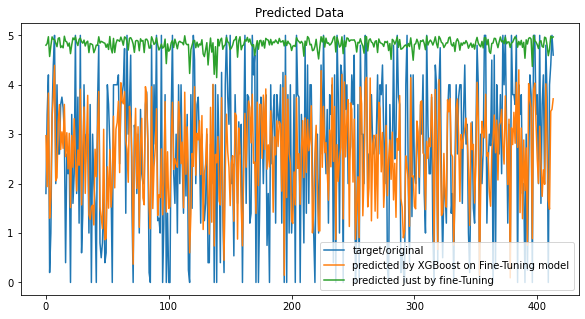

In [74]:
import matplotlib.pyplot as plt 

x_ax = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_test, label="target/original")
plt.plot(x_ax, predictions, label="predicted by XGBoost on Fine-Tuning model")
plt.plot(x_ax, X_test.normalize_cosine_similarity, label="predicted just by fine-Tuning")
plt.title("Predicted Data")
plt.legend()

plt.show()